In [2]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
plt.style.use('fivethirtyeight')
%matplotlib inline

In [14]:
# !pip install pandas_datareader
# from pandas_datareader import data as web

In [1]:
# df = web.DataReader('AAPL', data_source='yahoo',start='2012-01-01', end='2019-12-31')
# df

In [41]:
# df = pd.read_csv('BSESN.txt')
# df.to_csv('BSESN.csv')
# df.head(5)

In [118]:
df = pd.read_csv('N225.txt')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1975-02-21,4105.049805,4105.049805,4105.049805,4105.049805,4105.049805,0.0
1,1975-02-24,4182.859863,4182.859863,4182.859863,4182.859863,4182.859863,0.0
2,1975-02-25,4185.500000,4185.500000,4185.500000,4185.500000,4185.500000,0.0
3,1975-02-26,4206.319824,4206.319824,4206.319824,4206.319824,4206.319824,0.0
4,1975-02-27,4246.589844,4246.589844,4246.589844,4246.589844,4246.589844,0.0


In [119]:
print(df.shape)

(11201, 7)


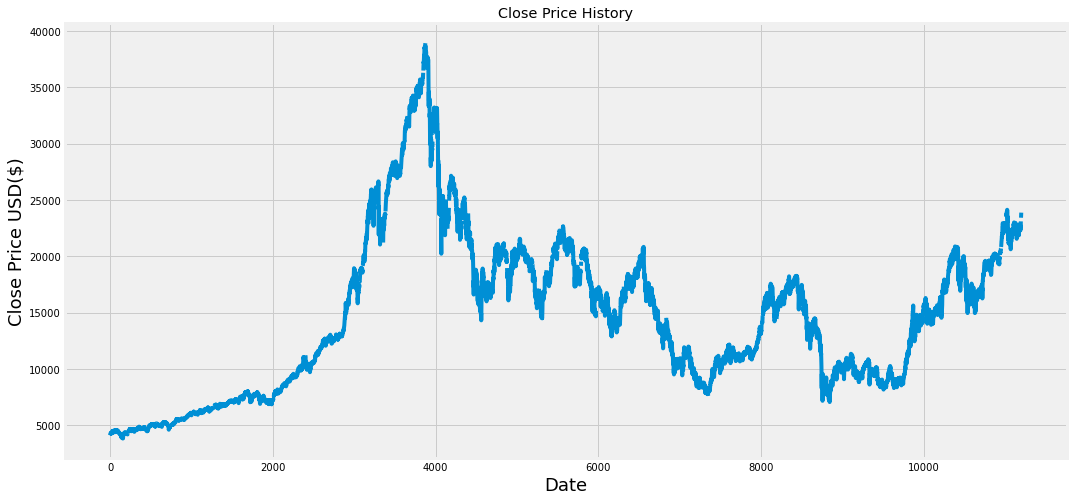

In [120]:
# visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show()

In [121]:
df = df.dropna(subset=['Close'])
df.shape

(10741, 7)

In [122]:
stock_daily_returns = df['Close'].pct_change(fill_method ='ffill')
stock_daily_returns

0             NaN
1        0.018955
2        0.000631
3        0.004974
4        0.009574
           ...   
11195    0.011978
11197    0.014110
11198    0.010759
11199    0.000102
11200    0.008237
Name: Close, Length: 10741, dtype: float64

In [123]:
df['returns'] = stock_daily_returns
df

,Date,Open,High,Low,Close,Adj Close,Volume,returns
0,1975-02-21,4105.049805,4105.049805,4105.049805,4105.049805,4105.049805,0.0,NaN
1,1975-02-24,4182.859863,4182.859863,4182.859863,4182.859863,4182.859863,0.0,0.018955
2,1975-02-25,4185.500000,4185.500000,4185.500000,4185.500000,4185.500000,0.0,0.000631
3,1975-02-26,4206.319824,4206.319824,4206.319824,4206.319824,4206.319824,0.0,0.004974
4,1975-02-27,4246.589844,4246.589844,4246.589844,4246.589844,4246.589844,0.0,0.009574
...,...,...,...,...,...,...,...,...
11195,2018-09-14,23035.779297,23105.279297,22965.480469,23094.669922,23094.669922,102700.0,0.011978
11197,2018-09-18,23042.189453,23481.529297,23039.259766,23420.539063,23420.539063,90600.0,0.014110
11198,2018-09-19,23754.960938,23842.050781,23672.519531,23672.519531,23672.519531,93600.0,0.010759
11199,2018-09-20,23752.789063,23781.750000,23582.150391,23674.929688,23674.929688,101600.0,0.000102


In [142]:
# create new dataframe only closing price
data = df.filter(['Close'])

dataset = data.values
# get the number of rows to train model
training_data_len =math.ceil( len(dataset)* 0.8)

training_data_len

8593

In [143]:
# scal data -preprocessing for NN
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00829101],
       [0.0105077 ],
       [0.01058292],
       ...,
       [0.56573938],
       [0.56580804],
       [0.57136331]])

In [144]:
# create training dataset
# create scaled traing dataset
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.00829101, 0.0105077 , 0.01058292, 0.01117604, 0.01232328,
       0.01308678, 0.01390297, 0.01287026, 0.01263181, 0.01271385,
       0.01330471, 0.0147035 , 0.01444169, 0.01521429, 0.01388245,
       0.01272127, 0.0130842 , 0.01365854, 0.01311497, 0.01233439,
       0.01176149, 0.01234893, 0.01272013, 0.01443086, 0.01648346,
       0.01911438, 0.01894345, 0.01932291, 0.01937248, 0.01791615,
       0.01654215, 0.01683957, 0.01814548, 0.018456  , 0.01843607,
       0.0187785 , 0.01793495, 0.01731048, 0.01734068, 0.0173045 ,
       0.0166544 , 0.01541485, 0.01589518, 0.01570629, 0.01646552,
       0.0188161 , 0.01911067, 0.01966535, 0.02091115, 0.0209214 ,
       0.02086613, 0.02104134, 0.02053596, 0.02138064, 0.01997445,
       0.02018725, 0.02101257, 0.02082397, 0.01986618, 0.02007729])]
[0.01967588987099239]



In [167]:
# convert x_train y_train to numpy
x_train, y_train = np.array(x_train), np.array(y_train)
# x_train.shape

In [146]:
# reshape data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(8533, 60, 1)

In [147]:
# build LSTM

model = Sequential()
# LSTM(neuron, return_sq=using another layer, input_shape)
model.add(LSTM(50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [148]:
# compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [157]:
# train model
model.fit(x_train,y_train, batch_size=1, epochs=10)

Epoch 1/10
8533/8533 [==============================] - 208s 24ms/step - loss: 1.8038e-04
Epoch 2/10
8533/8533 [==============================] - 209s 24ms/step - loss: 1.3137e-04
Epoch 3/10
8533/8533 [==============================] - 210s 25ms/step - loss: 1.1204e-04
Epoch 4/10
8533/8533 [==============================] - 209s 25ms/step - loss: 1.1015e-04
Epoch 5/10
8533/8533 [==============================] - 206s 24ms/step - loss: 9.4814e-05
Epoch 6/10
8533/8533 [==============================] - 216s 25ms/step - loss: 8.5169e-05
Epoch 7/10
8533/8533 [==============================] - 206s 24ms/step - loss: 8.9509e-05
Epoch 8/10
8533/8533 [==============================] - 211s 25ms/step - loss: 8.6000e-05
Epoch 9/10
8533/8533 [==============================] - 213s 25ms/step - loss: 8.1995e-05
Epoch 10/10
8533/8533 [==============================] - 212s 25ms/step - loss: 7.6535e-05


In [158]:
# creaate testing dataset
# create a new array containing scaled value from index 1543 to 2003

test_data = scaled_data[training_data_len-60:,:]
x_test = []
y_test = dataset[training_data_len:,:]

for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i,0])



In [159]:
# convert numpy
x_test = np.array(x_test)

# reshape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [160]:
# get model predicted price value

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [161]:
# get root mean square error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

78.41263885387569

In [113]:
# rms=np.sqrt(np.mean(np.power((valid-closing),2)))

array([[ 4300.859863],
       [ 4333.899902],
       [ 4323.459961],
       ...,
       [35169.16016 ],
       [34376.98828 ],
       [34474.37891 ]])

In [162]:
valid = data[training_data_len:]
valid['Predictions'] = predictions
# print(valid)
valid[['Close', 'Predictions']]

<ipython-input-162-3ae3fd5acf8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


,Close,Predictions
9038,10378.030273,10158.825195
9039,10536.919922,10324.741211
9040,10494.709961,10463.111328
9041,10634.230469,10441.191406
9042,10638.059570,10579.559570
...,...,...
11195,23094.669922,22693.406250
11197,23420.539063,22918.943359
11198,23672.519531,23243.042969
11199,23674.929688,23482.720703


<ipython-input-163-c046ebcd647b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


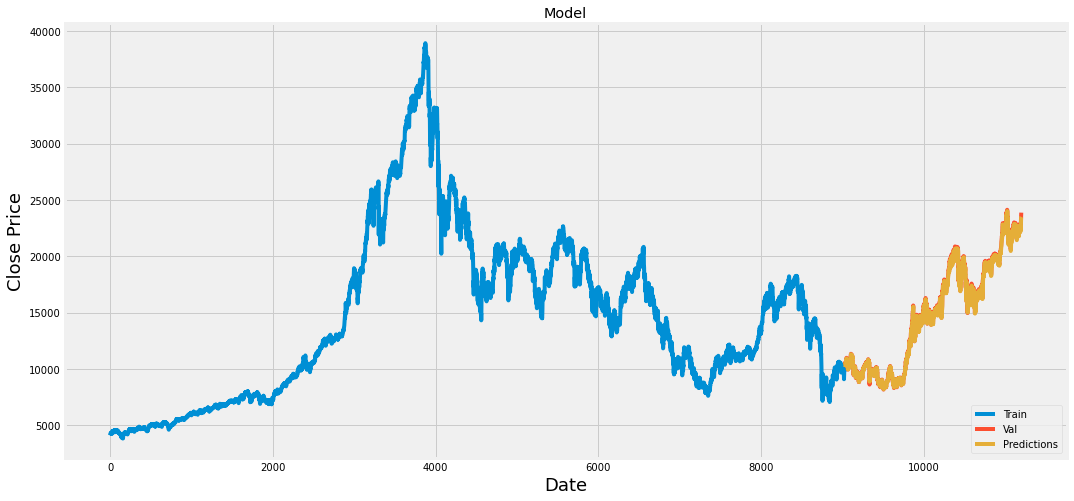

In [163]:
# plot data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# visualize data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
# plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [138]:
#  show valid and predicted price
valid

,Close,Predictions
10112,14298.209961,14172.347656
10113,14096.589844,14132.384766
10114,14006.440430,13992.401367
10115,14075.250000,13871.872070
10116,14042.169922,13859.990234
...,...,...
11195,23094.669922,22552.458984
11197,23420.539063,22775.265625
11198,23672.519531,23063.716797
11199,23674.929688,23328.644531


In [164]:
valid['Difference'] = valid['Predictions'] - valid['Close']
valid

<ipython-input-164-551c45cfff74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Difference'] = valid['Predictions'] - valid['Close']


,Close,Predictions,Difference
9038,10378.030273,10158.825195,-219.205078
9039,10536.919922,10324.741211,-212.178711
9040,10494.709961,10463.111328,-31.598633
9041,10634.230469,10441.191406,-193.039063
9042,10638.059570,10579.559570,-58.500000
...,...,...,...
11195,23094.669922,22693.406250,-401.263672
11197,23420.539063,22918.943359,-501.595704
11198,23672.519531,23243.042969,-429.476562
11199,23674.929688,23482.720703,-192.208985


In [141]:
# get the quote



In [140]:
# 